## Segmentation Performance Analysis

In this notebook we can explore the performance of each neural network with respect to segmentation accuracy.

The primary metrics we use to measure accuracy are the DICE score, Hausdorf distance (HD) and Average Symmetric Surface Distance (ASSD).

#### Dice Score

Measures the fraction of overlap between two sets. Dice score of 1 represents perfect accuracy, whereas a dice score of 0 represents no overlap at all.

![title](figures/dice.png)

#### Hausdorf Distance

The largest shortest distance between two sets. Worst case error.

![title](figures/hd.png)

#### Average Symmetric Surface Distance

The average shortest distance between two sets.

![title](figures/ASSD.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt

import os
import sys

sys.path.append(os.path.abspath('..'))
from modules import io

FIGSIZE = (8,8)

In [2]:
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)

plt.rcParams.update({"font.size":16})
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({"font.size":16})

<Figure size 432x288 with 0 Axes>

## Loading Results

We have computed the performance of each network on the segmentations from the vascular model repository and stored the results in CSV files.

The following code will load the csv files and prepare them for plotting.

In [5]:
RADIUS_SMALL = 0.55
results_path = "./results"

data_key = 'TEST'

experiments = ['convnet_simple',
               'convnet_fc250_simple',
               'convnet_fc250_simple_aug',
               
               'convnet_fc250',
               'convnet_fc250_testclean',
               'convnet_fc250_f64_clean',
               'convnet_fc250_l10_clean',
               'convnet_fc250_l20_clean',
               'convnet_fc250_l10_train150k_clean',
               'convnet_fc250_l20_train150k_clean',
               'convnet_fc1000_250_l10_train150k_clean',
               'convnet_fc1000_250_l20_train150k_clean',
                
               'convnet_ct_fc250',
               'convnet_ct_fc250_large', 
               'convnet_ct_fc250_small', 
                
               'convnet_fc250_clean',
               'convnet_fc250_clean_aug',
               
               'convnet_fc1000_clean',
               'convnet_fc1000_clean_drop',
               'convnet_fc1000_clean_aug',
               'convnet_fc2000_clean',
               'convnet_fc1000_250_clean_drop',
               
               'resnet_2_fc250',
              
               'googlenet_clean',
               'googlenet_train150k_clean',
               'googlenet_train300k_clean',
               'googlenet_train300k_aug_clean',
               'googlenet_train300k_clean_ct',
               'googlenet_train300k_clean_mr',]

labels = [e.replace('_','-') for e in experiments]

file_labels = experiments

colors = ["#4878D0", 
          "#4878D0",
          "#4878D0",
          
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          "#6ACC64",
          
          "#D65F5F",
          "#D65F5F",
          "#D65F5F",
          
          "#956CB4",
          "#956CB4",
          
          "#D5BB67",
          "#D5BB67",
          "#D5BB67",
          "#D5BB67",
          "#D5BB67",
           
          "#82C6E2",
         
          "orange",
          "orange",
          "orange",
          "orange",
          "orange",
          "orange"]

markers = ['o', '^', 'x',
           
           'o', '^', 'x', 's', '*', 'v', 'P', 'D', '|',
           
           'o', '^', 'x',
           
           'o', '^', 'x', 's', '*',
           
           'o', '^',
            
           'o',
          
           'o', '^',  'x', 's', '*', 'v']

hatch   = ['', '/', '+',
           
           '', '/', '+', 'O', '^', '-', '.','\\', 'o',
           
           '', '/', '+',
           
           '', '/', '+', 'O', '^',
           
           '', '/',
           
           '',
           
           '', '/', '+', 'O', '^', '-']

In [6]:
dataframes = []
names = []
for e in experiments:
    fn = './config/{}.yaml'.format(e)
    config = io.load_yaml(fn)
    
    names.append(config['NAME'])
    
    data_fn = "{}/{}/{}/{}.csv".format(
        results_path, config['NAME'], data_key.lower(), data_key 
    )
    
    df = pd.read_csv(data_fn)
    print(e, df.shape)
    dataframes.append(df)
    
data = pd.concat(dataframes,axis=0)
print(data.shape)
print(data.columns)

convnet_simple (627, 9)
convnet_fc250_simple (627, 9)
convnet_fc250_simple_aug (627, 9)
convnet_fc250 (6286, 9)
convnet_fc250_testclean (6286, 9)
convnet_fc250_f64_clean (3784, 9)
convnet_fc250_l10_clean (3784, 9)
convnet_fc250_l20_clean (3784, 9)
convnet_fc250_l10_train150k_clean (3784, 9)
convnet_fc250_l20_train150k_clean (3784, 9)
convnet_fc1000_250_l10_train150k_clean (3784, 9)
convnet_fc1000_250_l20_train150k_clean (3784, 9)
convnet_ct_fc250 (1924, 9)
convnet_ct_fc250_large (150, 9)
convnet_ct_fc250_small (1770, 9)
convnet_fc250_clean (3784, 9)
convnet_fc250_clean_aug (3784, 9)
convnet_fc1000_clean (3784, 9)
convnet_fc1000_clean_drop (3784, 9)
convnet_fc1000_clean_aug (3784, 9)
convnet_fc2000_clean (3784, 9)
convnet_fc1000_250_clean_drop (3784, 9)
resnet_2_fc250 (6286, 9)
googlenet_clean (3784, 9)
googlenet_train150k_clean (3784, 9)
googlenet_train300k_clean (3784, 9)
googlenet_train300k_aug_clean (3784, 9)
googlenet_train300k_clean_ct (1298, 9)
googlenet_train300k_clean_mr (1604,

## Dice Histogram

The following cell computes the mean dice score across all segmentations for each neural network. The results are sorted and plotted in a histogram.

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


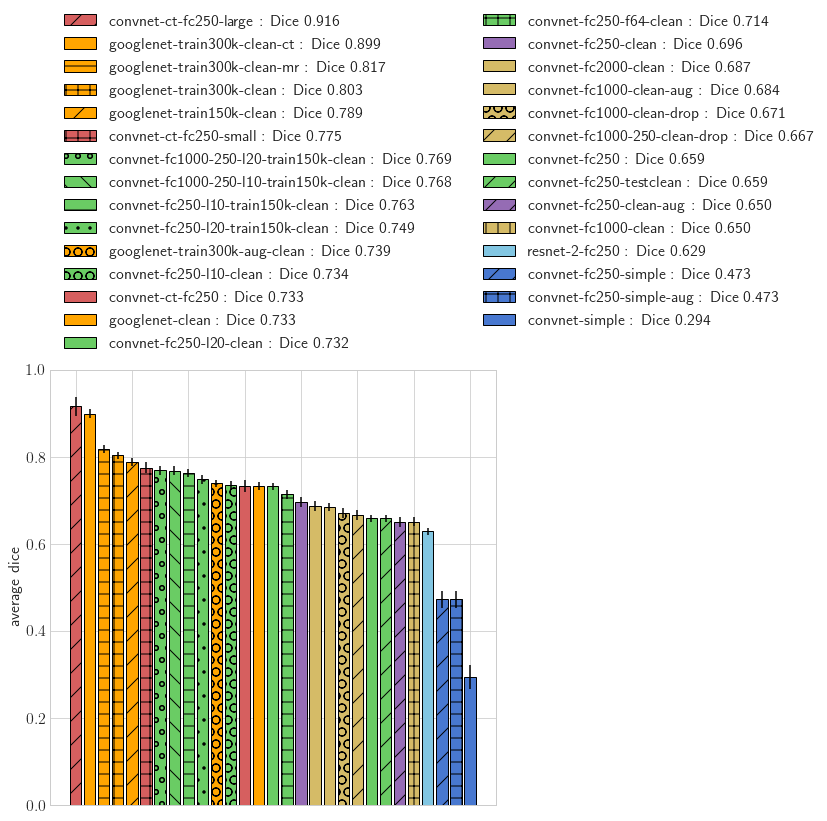

In [7]:
plt.figure(figsize=FIGSIZE)
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('./figures/dice_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

## Large Vessel Dice Score

Large vessels are typically easier to segment. So in this cell we filter the vascular data to only large segmentations and repeat the dice calculation. 

Note how they are significantly higher than for the overall dataset.

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


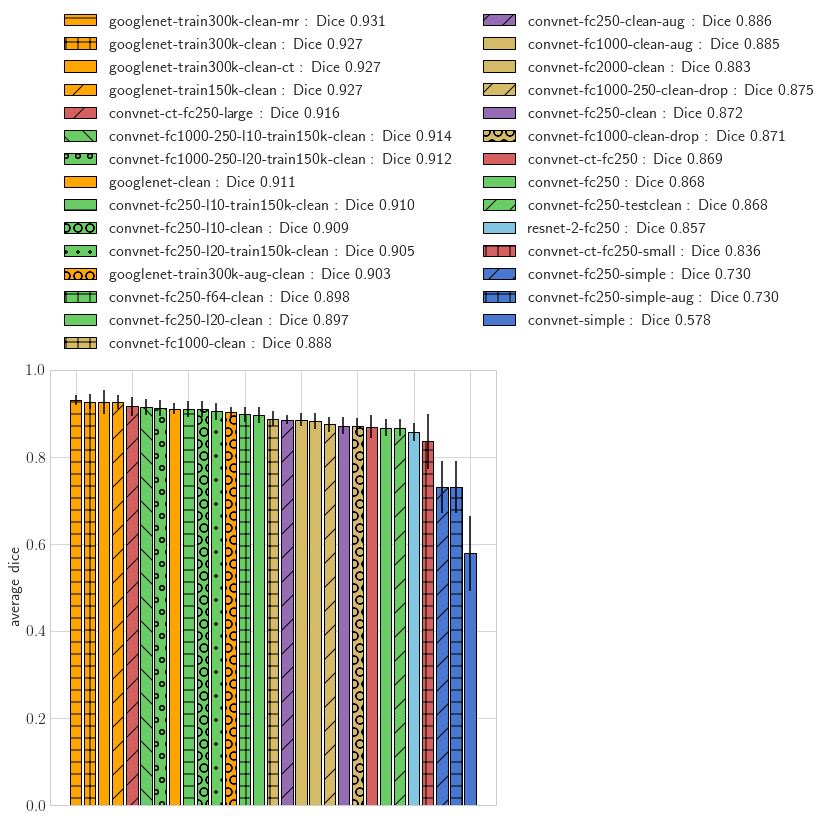

In [8]:
plt.figure(figsize=FIGSIZE)
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    d = d.loc[d['radius']>RADIUS_SMALL]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('./figures/dice_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

## Small Vessel Dice Score

Similarly we can investigate the accuracy on just small vessels. These are harder to segment so we expect to see lower dice scores.

Since small vessels make up the majority of the dataset, these are closer to the overall dice score.

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


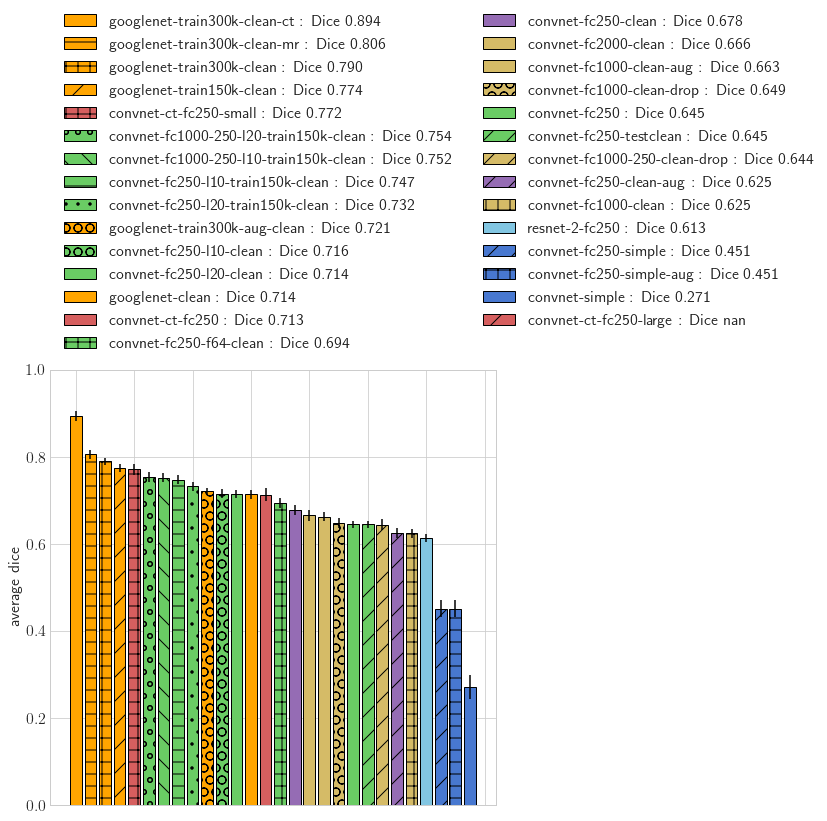

In [9]:
plt.figure(figsize=FIGSIZE)
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    d = d.loc[d['radius']<=RADIUS_SMALL]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['dice']  = np.mean(d['dice'])
    t['err']   = np.std(d['dice'])/np.sqrt(len(d['dice']))
    
    t['label'] = labels[i] + ' : Dice {0:.3f}'.format(t['dice'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: -x['dice'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['dice'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average dice')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
plt.ylim(0,1)
plt.savefig('./figures/dice_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

## Hausdorf Histogram

Here we plot the mean Hausdorf distance across the vascular dataset for all neural networks. The smaller the hausdorf distance, the better the performance of the network.

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


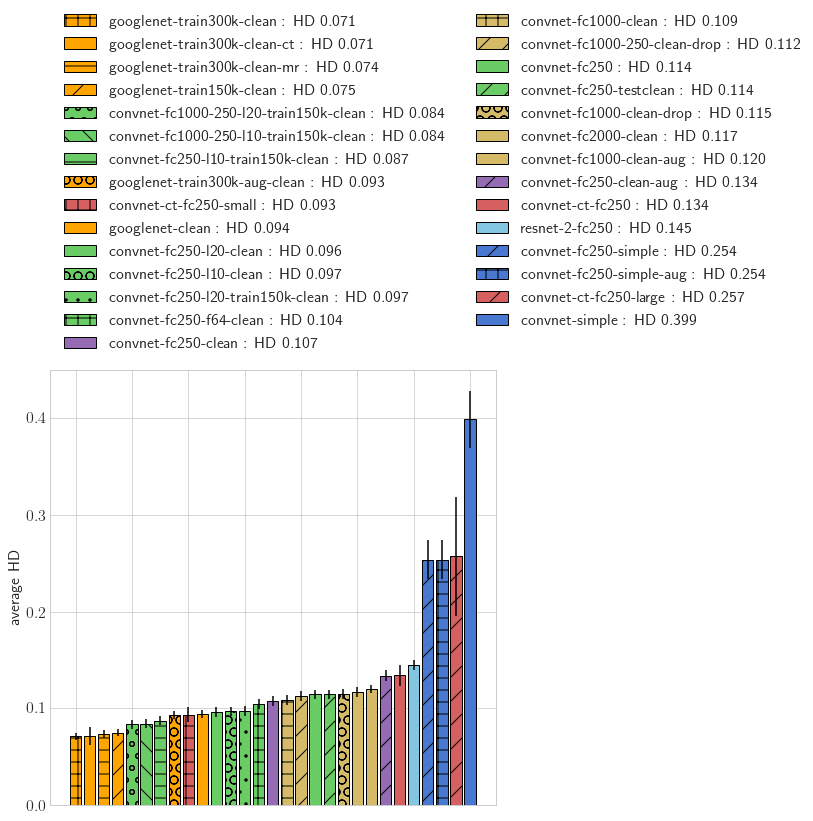

In [10]:
plt.figure(figsize=FIGSIZE)
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['HAUSDORFF']  = np.mean(d['HAUSDORFF'])
    t['err']   = np.std(d['HAUSDORFF'])/np.sqrt(len(d['HAUSDORFF']))
    
    t['label'] = labels[i] + ' : HD {0:.3f}'.format(t['HAUSDORFF'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: x['HAUSDORFF'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['HAUSDORFF'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average HD')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
#plt.ylim(0,1)
plt.savefig('./figures/hd_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

## ASSD histogram

Here we plot a histogram of the ASSD across the vascular dataset for each network. A smaller ASSD indicates better performance.

We see that the best networks attain a mean ASSD that is close to one pixel in size, indicating a high degree of segmentation accuracy.

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


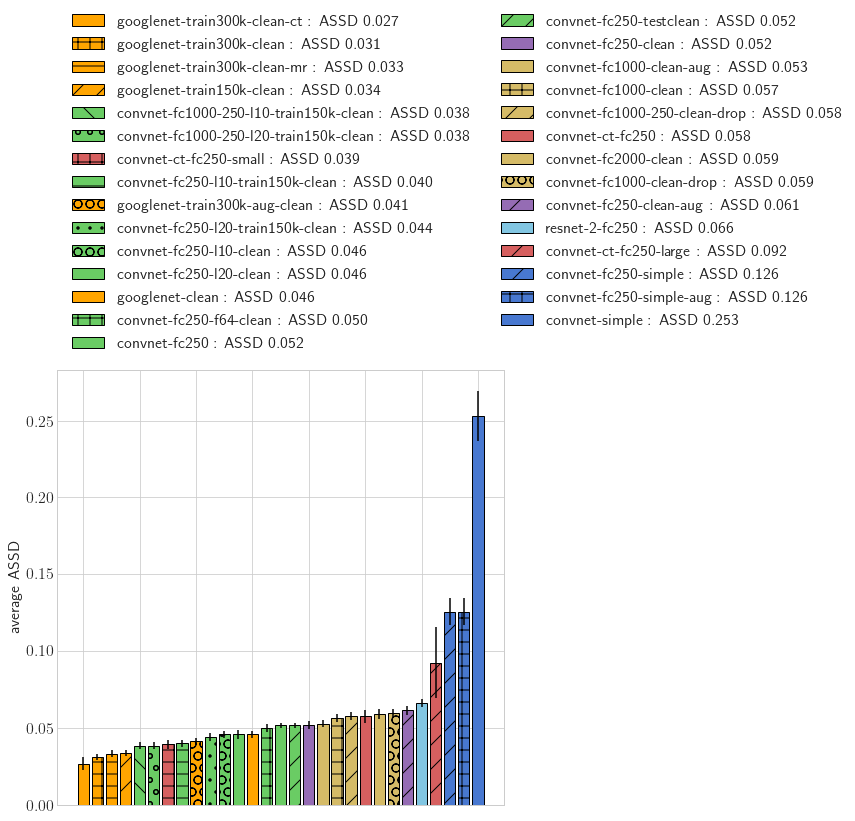

In [11]:
plt.figure(figsize=FIGSIZE)
dx = 5
width = 4

bars = []
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    t = {}
    t['color'] = colors[i]
    t['hatch'] = hatch[i]
    t['ASSD']  = np.mean(d['ASSD'])
    t['err']   = np.std(d['ASSD'])/np.sqrt(len(d['ASSD']))
    
    t['label'] = labels[i] + ' : ASSD {0:.3f}'.format(t['ASSD'])
    
    t['x']     = dx
    bars.append(t)
    
bars = sorted(bars, key=lambda x: x['ASSD'])

for i in range(len(bars)):
    e = bars[i]
    plt.bar(i*e['x'], height=e['ASSD'], width=width, color=e['color'], 
            label=e['label'], yerr=3*e['err'], hatch=e['hatch'],edgecolor='k')

    
lgd = plt.legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3, ncol=2)

plt.ylabel('average ASSD')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
#plt.tight_layout()
#plt.ylim(0,1)
plt.savefig('./figures/assd_bar.pdf', bbox_extra_artists=(lgd,), 
            bbox_inches='tight', pad_inches=0,dpi=500)

plt.show()
plt.close()

## Individual Segmentation Dice Histogram

While statistics give us a good high level view of the performance of each method, it is instructive to see the exact error distribution on the test set.

Here we plot a histogram of the dice scores for each individual vessel for each network. This shows us whether the errors are mostly low and whether there are any outliers.

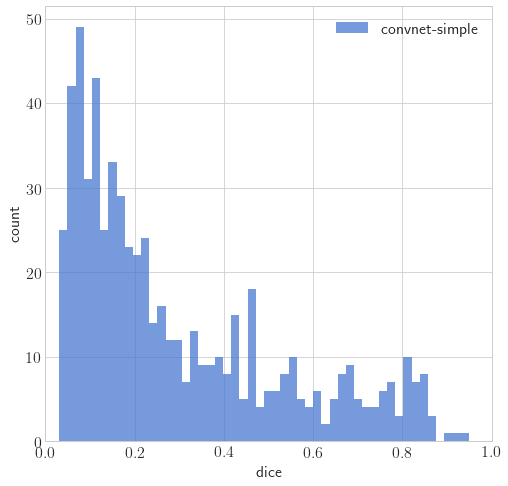

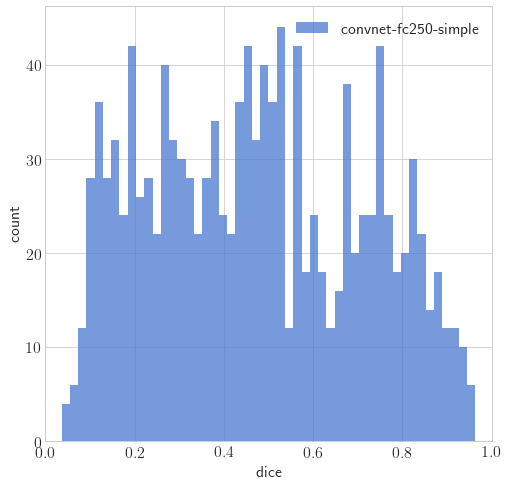

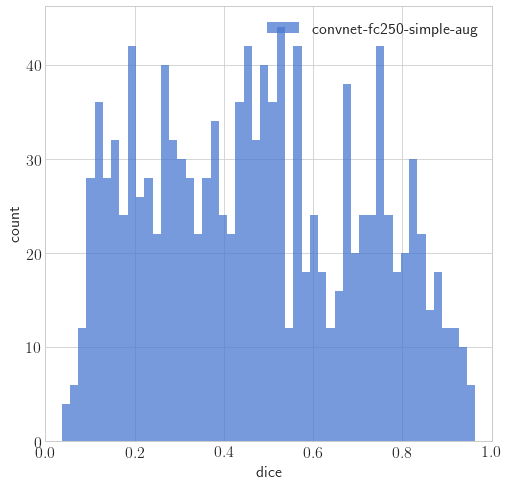

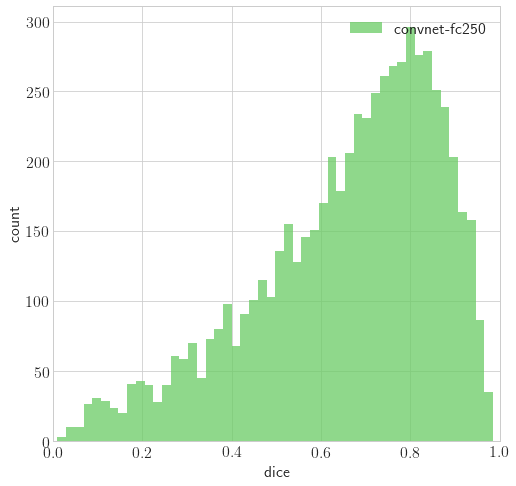

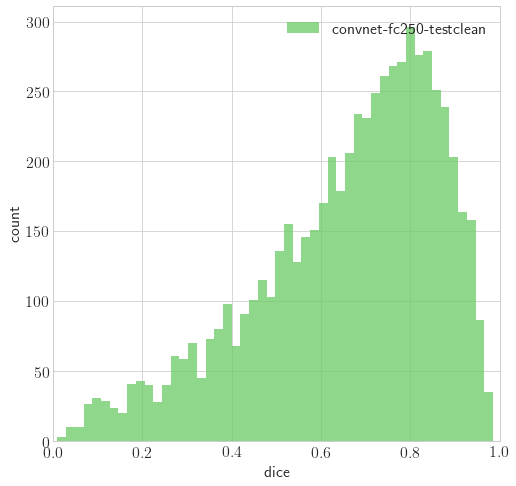

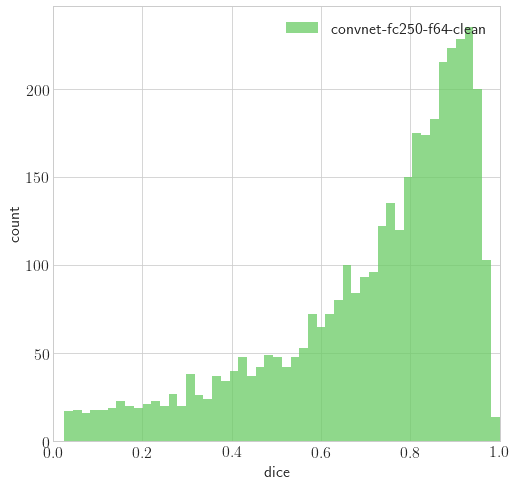

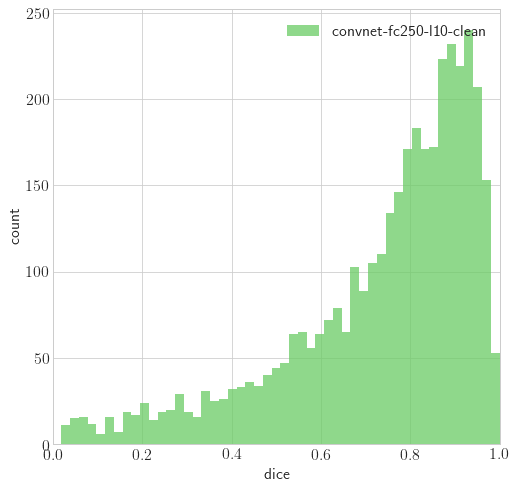

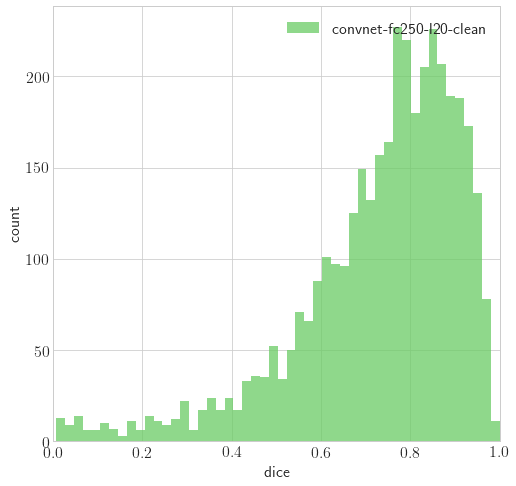

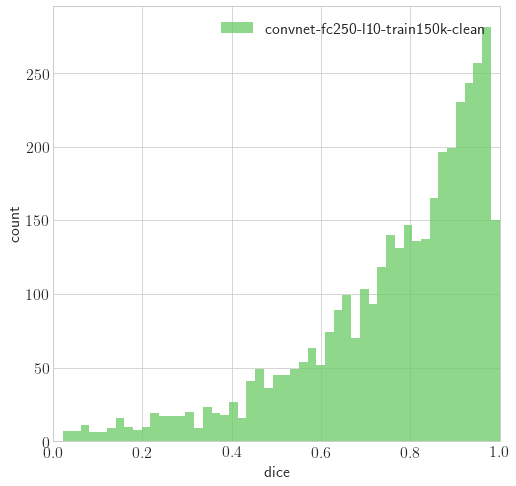

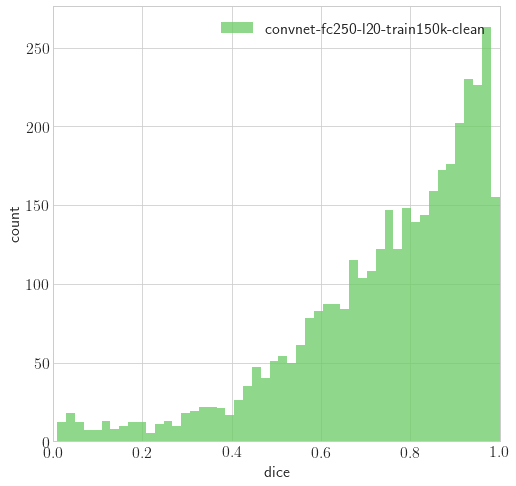

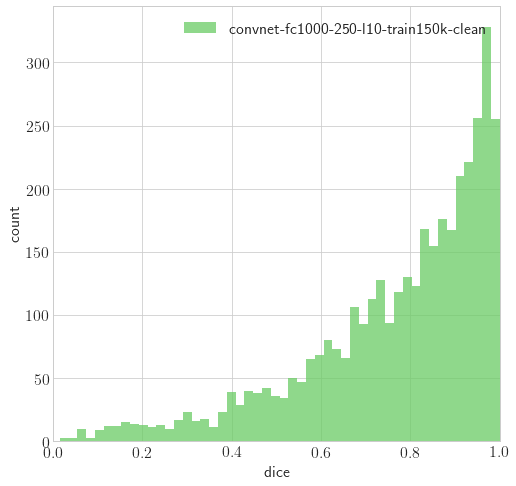

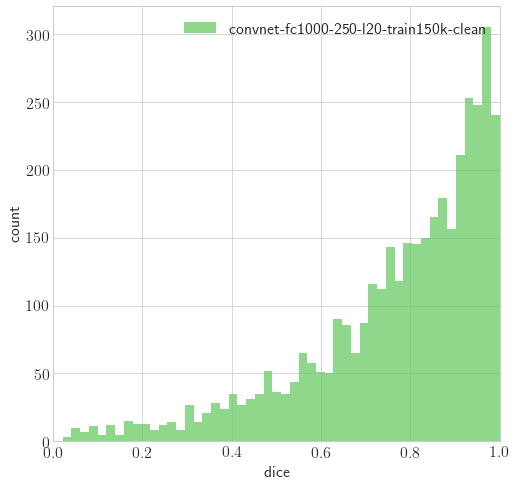

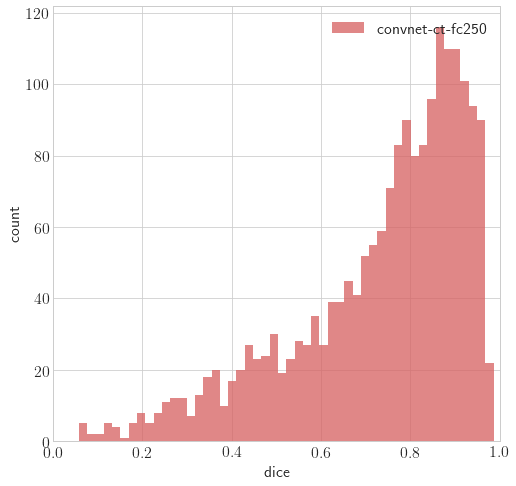

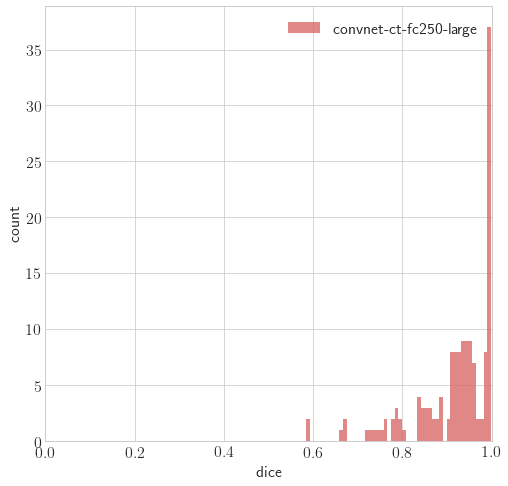

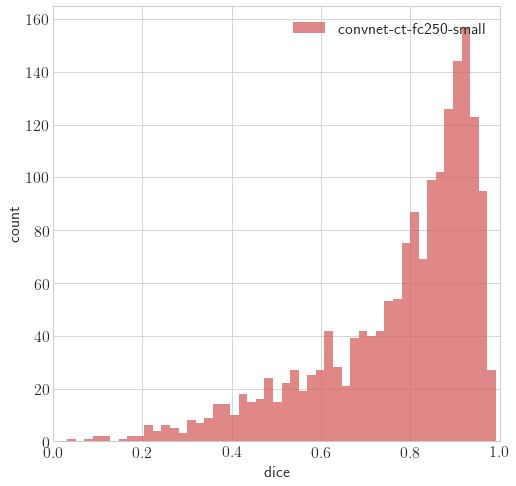

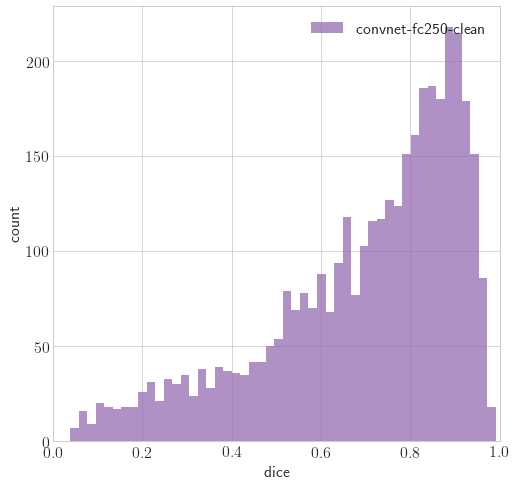

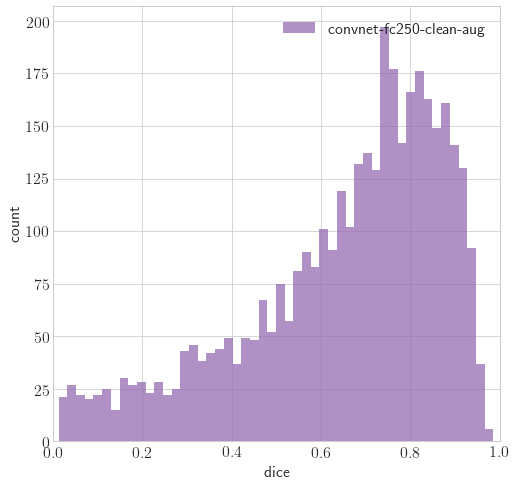

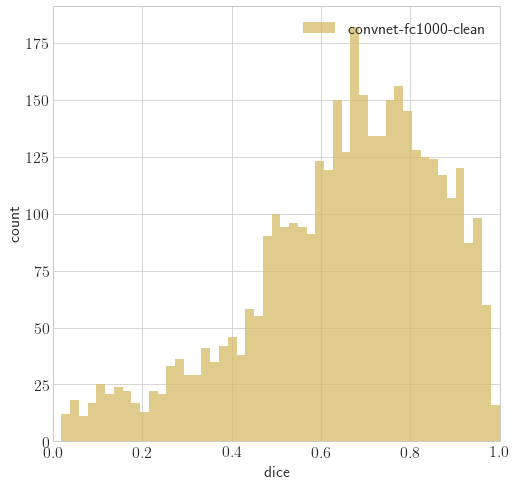

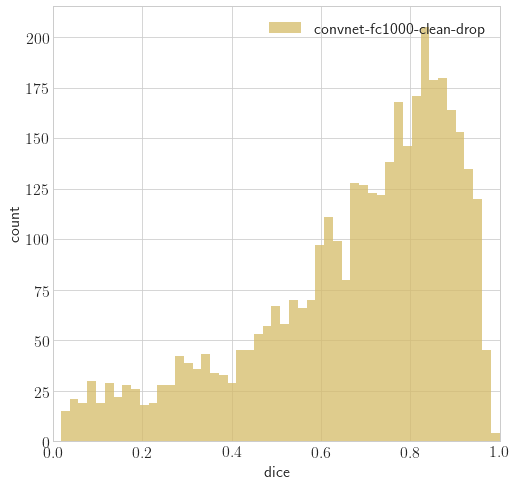

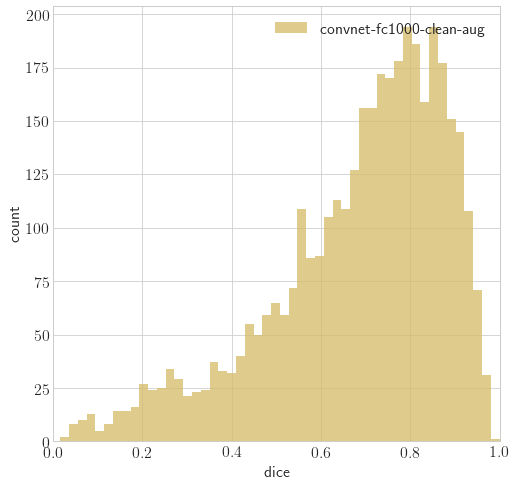

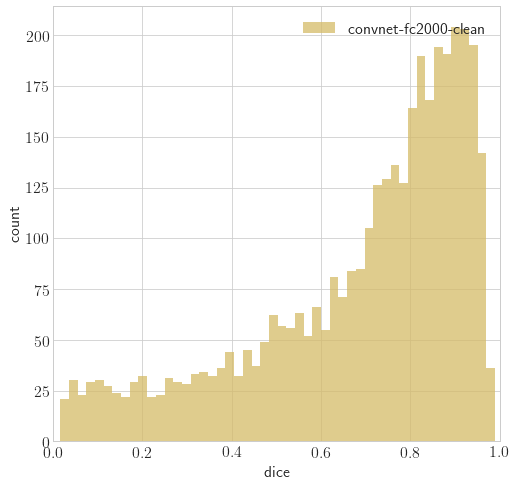

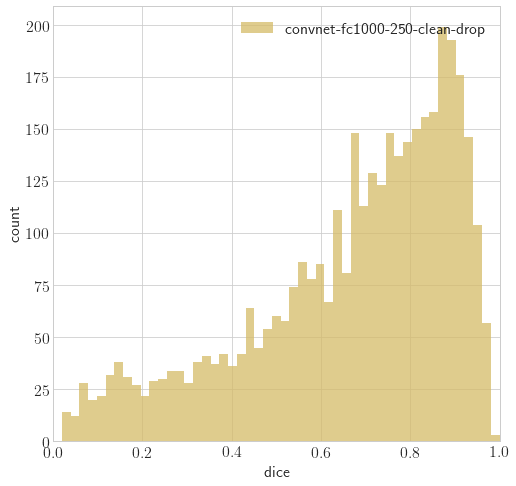

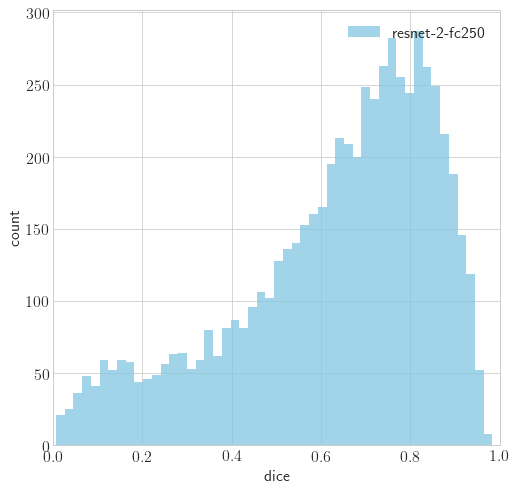

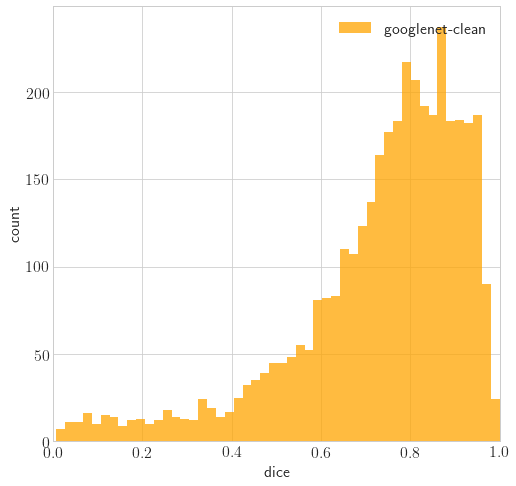

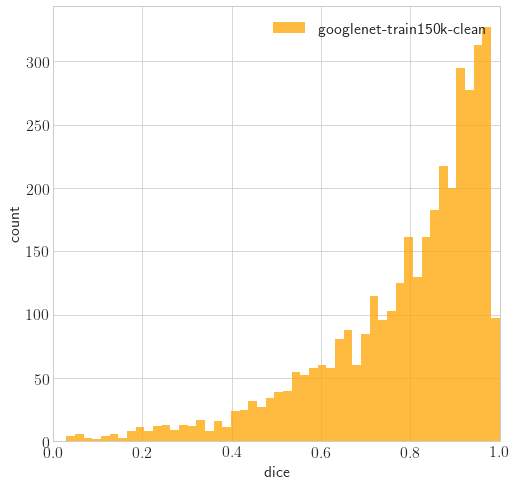

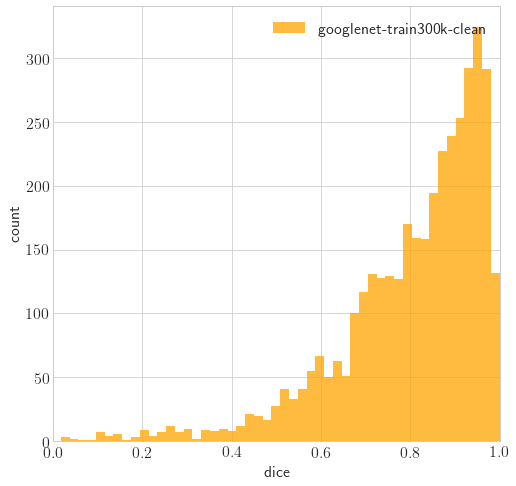

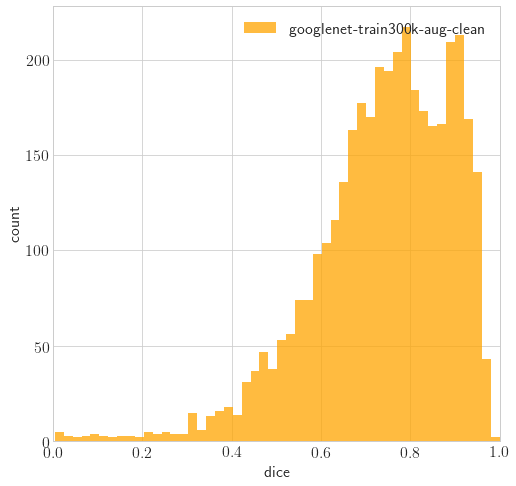

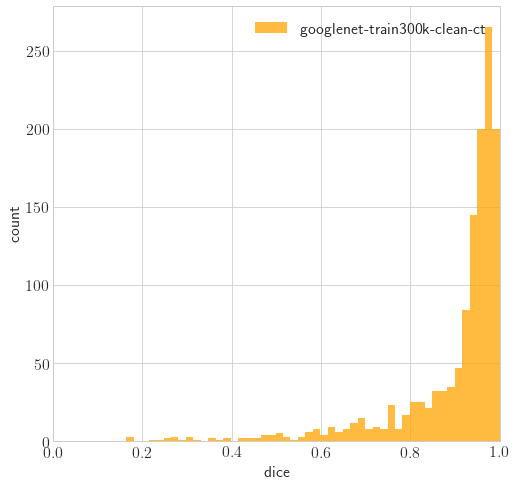

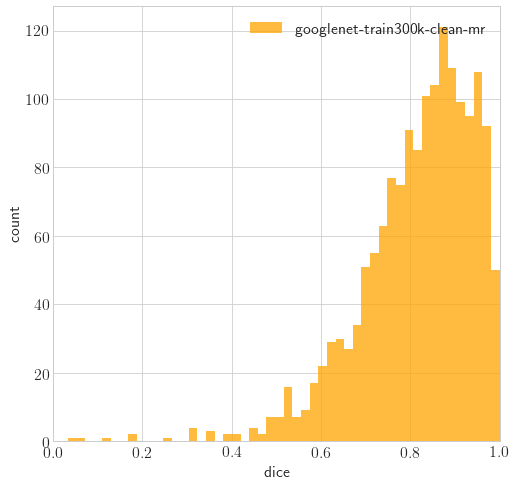

In [12]:
for i,name in enumerate(names):
    d = data.loc[data['model_name'] == name]
    
    label = labels[i]
    file_label = file_labels[i]
    color = colors[i]
    
    plt.figure(figsize=FIGSIZE)
    plt.hist(d['dice'], bins=50, alpha=0.75, color=color, label=label)

    plt.xlabel('dice')
    plt.ylabel('count')
    plt.xlim(0,1)
    plt.legend(loc='upper right')
    plt.savefig('./figures/dice_hist_{}.pdf'.format(file_label),dpi=500)
    plt.show()